## Deadline

Wednesday, November 22, 2017, 11:59PM

## Important notes

- When you push your Notebook to GitHub, all the cells must already have been evaluated.
- Don't forget to add a textual description of your thought process and of any assumptions you've made.
- Please write all your comments in English, and use meaningful variable names in your code.

## Question 1: Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 5 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to brush up your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

#### 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").

What might a naive "researcher" conclude from this superficial analysis?

#### 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

#### 3. A propensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).)

#### 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?


#### 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


#### 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?


___

## Question 2: Applied ML

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project if you plan to work with text!

1. Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency–inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).


2. Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.



In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from multiprocessing import Pool

## Question 1

### 1. A naive analysis

In [2]:
def plot_re78(treat_group, control_group):
    
    lower_bound_left = min(min(treat_group['re78']), min(control_group['re78']))
    upper_bound_left = max(max(treat_group['re78']), max(control_group['re78']))
    range_ = (lower_bound_left, upper_bound_left)

    num_bins = 15

    fig, axes = plt.subplots(1, 1, figsize=(15,5), sharey=True)
    fig.suptitle('Real earnings in 1978', fontsize=14)
    treat_group['re78'].plot.hist(bins = num_bins, range=range_, ax=axes, alpha=0.7, label='treat')
    control_group['re78'].plot.hist(bins = num_bins, range=range_, ax=axes, alpha=0.5, label='control')
    axes.legend(loc='upper right')
    axes.set_xlabel('Income')
    plt.show()
    
def boxplot_re78(treat_group, control_group):
    merge = pd.concat([treat_group['re78'], control_group['re78']], axis=1)
    merge.columns = ['treat', 'control']

    fig, axes = plt.subplots(1, 1, figsize=(15,10))
    fig.suptitle("Boxplots", fontsize=14)
    merge.plot.box(ax=axes, sym='k.')
    axes.set_ylabel('Income')
    plt.show()

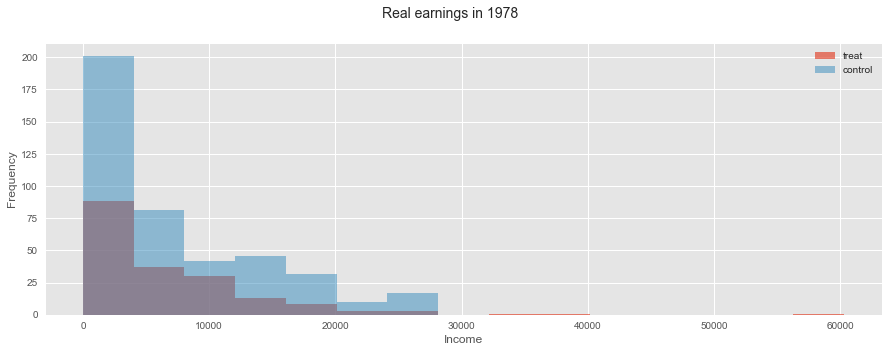

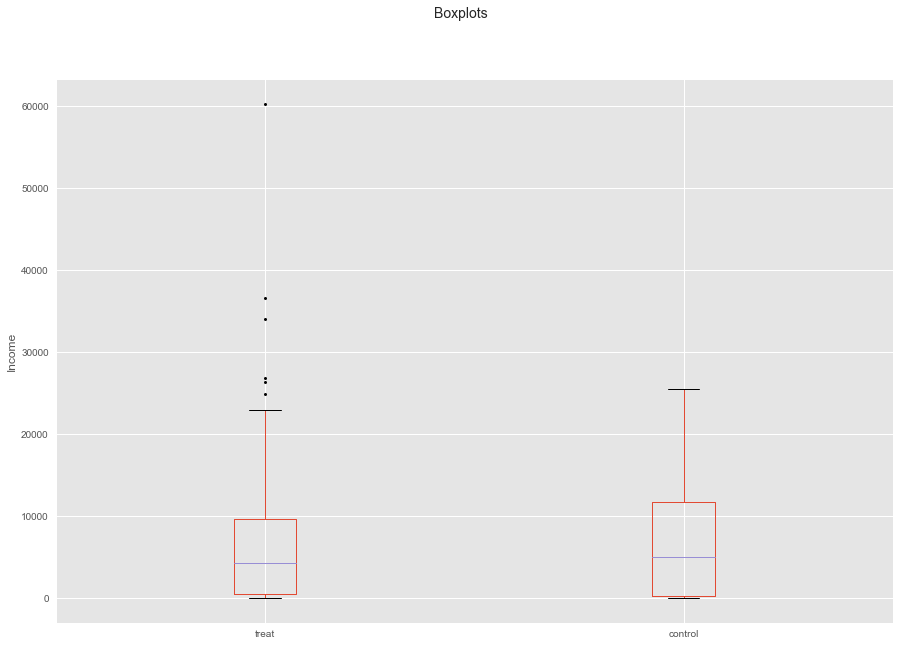

Number of people in treat group:  185 
Number of people in control group:  429


In [3]:
df = pd.read_csv('lalonde.csv')

treat_group_o = df[df['treat'] == 1]
control_group_o = df[df['treat'] == 0]
    
plot_re78(treat_group_o, control_group_o)
boxplot_re78(treat_group_o, control_group_o)


num_people_treat_o = treat_group_o['re78'].shape[0]
num_people_control_o = control_group_o['re78'].shape[0]

print('Number of people in treat group: ', num_people_treat_o, '\nNumber of people in control group: ', num_people_control_o)

From this naive analysis, we can see that participating in the job training (JTP) program does not imply a significant increase of the income, it is even doing worst looking at the general trend. Indeed, we see that the median income from people who did not take the job training program is slightly higher from the ones who did take it. A few people (outliers) seemed to have fully benefit from the program, but as it concerns only a very small proportion, we cannot draw similar conclusion for the overall group. We also notice that the two categories are not evenly represented: there is much more people who did not participate in the JTP.

### 2. A closer look at the data

In this section, we focus the analysis of the data in four different contexts:

- social status,
- school background,
- ethnic origin,
- real earnings.

In [4]:
def plot_(treat_group, control_group, title, left_column, left_xlabel, left_legend, right_column, right_xlabel, right_legend):
    
    lower_bound_left = min(min(treat_group[left_column]), min(control_group[left_column]))
    upper_bound_left = max(max(treat_group[left_column]), max(control_group[left_column]))
    range_left = (lower_bound_left, upper_bound_left)
    
    lower_bound_right = min(min(treat_group[right_column]), min(control_group[right_column]))
    upper_bound_right = max(max(treat_group[right_column]), max(control_group[right_column]))
    range_right = (lower_bound_right, upper_bound_right)
    
    num_bins=15
    
    fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)
    fig.suptitle(title, fontsize=14)
    treat_group[left_column].plot.hist(bins=num_bins, range=range_left, ax=axes[0], alpha=0.7, label='treat')
    control_group[left_column].plot.hist(bins=num_bins, range=range_left, ax=axes[0], alpha=0.5, label='control')
    axes[0].legend(loc=left_legend)
    axes[0].set_xlabel(left_xlabel)
    treat_group[right_column].plot.hist(bins=num_bins, range=range_right, ax=axes[1], alpha=0.7, label='treat')
    control_group[right_column].plot.hist(bins=num_bins, range=range_right, ax=axes[1], alpha=0.5, label='control')
    axes[1].legend(loc=right_legend)
    axes[1].set_xlabel(right_xlabel)
    plt.show()
    
import matplotlib.ticker as ticker

def plot_1binary_(treat_group, control_group, title, left_column, left_xlabel, left_legend, right_column, right_xlabel, right_legend):
    
    lower_bound_left = min(min(treat_group[left_column]), min(control_group[left_column]))
    upper_bound_left = max(max(treat_group[left_column]), max(control_group[left_column]))
    range_left = (lower_bound_left, upper_bound_left)
    
    num_bins=15
    
    fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)
    fig.suptitle(title, fontsize=14)
    treat_group[left_column].plot.hist(bins=num_bins, range=range_left, ax=axes[0], alpha=0.7, label='treat')
    control_group[left_column].plot.hist(bins=num_bins, range=range_left, ax=axes[0], alpha=0.5, label='control')
    axes[0].legend(loc=left_legend)
    axes[0].set_xlabel(left_xlabel)
    treat_group[right_column].plot.hist(bins=[0, 0.2, 0.4, 0.6, 0.8, 1, 1.2], align = 'left', ax=axes[1], alpha=0.7, label='treat')
    control_group[right_column].plot.hist(bins=[0, 0.2, 0.4, 0.6, 0.8, 1, 1.2], align = 'left', ax=axes[1], alpha=0.5, label='control')
    axes[1].legend(loc=right_legend)
    axes[1].set_xlabel(right_xlabel)
    axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.show()
    
def plot_2binary_(treat_group, control_group, title, left_column, left_xlabel, left_legend, right_column, right_xlabel, right_legend):
    fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)
    fig.suptitle(title, fontsize=14)
    treat_group[left_column].plot.hist(bins=[0, 0.2, 0.4, 0.6, 0.8, 1, 1.2], align = 'left',ax=axes[0], alpha=0.7, label='treat')
    control_group[left_column].plot.hist(bins=[0, 0.2, 0.4, 0.6, 0.8, 1, 1.2], align = 'left',ax=axes[0], alpha=0.5, label='control')
    axes[0].legend(loc=left_legend)
    axes[0].set_xlabel(left_xlabel)
    axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    treat_group[right_column].plot.hist(bins=[0, 0.2, 0.4, 0.6, 0.8, 1, 1.2], align = 'left', ax=axes[1], alpha=0.7, label='treat')
    control_group[right_column].plot.hist(bins=[0, 0.2, 0.4, 0.6, 0.8, 1, 1.2], align = 'left', ax=axes[1], alpha=0.5, label='control')
    axes[1].legend(loc=right_legend)
    axes[1].set_xlabel(right_xlabel)
    axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.show()

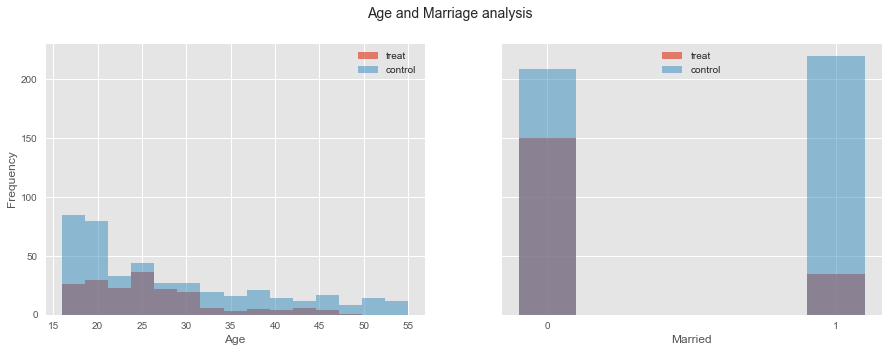

In [5]:
plot_1binary_(treat_group_o, control_group_o, 'Age and Marriage analysis', 'age', 'Age', 'upper right',
      'married', 'Married', 'upper center')

We see that there is not a very similar distribution of ages. For the distribution of married people among the groups, there is an even number of married and single people who did not participate in the JTP, but there is a significant difference among the ones who did participate.

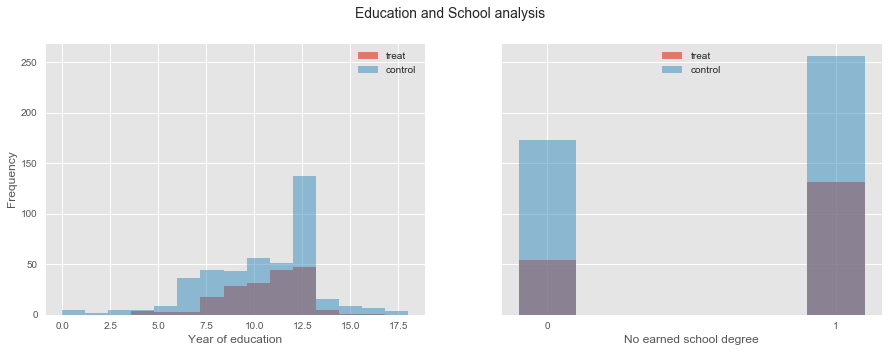

In [6]:
plot_1binary_(treat_group_o, control_group_o, 'Education and School analysis', 'educ', 'Year of education', 'upper right',
      'nodegree', 'No earned school degree', 'upper center')

For the school background, we see that both components are represented in a similar fashion, if we ignore the misrepresentation of the two catgories.

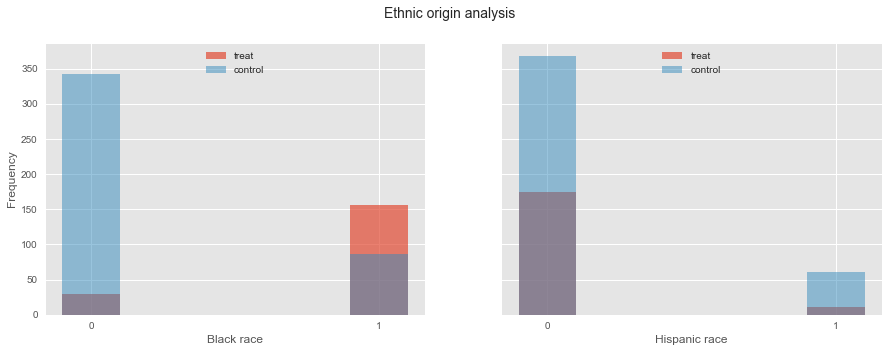

In [7]:
plot_2binary_(treat_group_o, control_group_o, 'Ethnic origin analysis', 'black', 'Black race', 'upper center',
      'hispan', 'Hispanic race', 'upper center')

If we compare the black race to the other ethnic groups we see that the category of people who participated in the JTP is much more represented. We have the exact opposite for the hispanic race. We can conlcude that the representation of the different ethnic origins is very badly represented. 

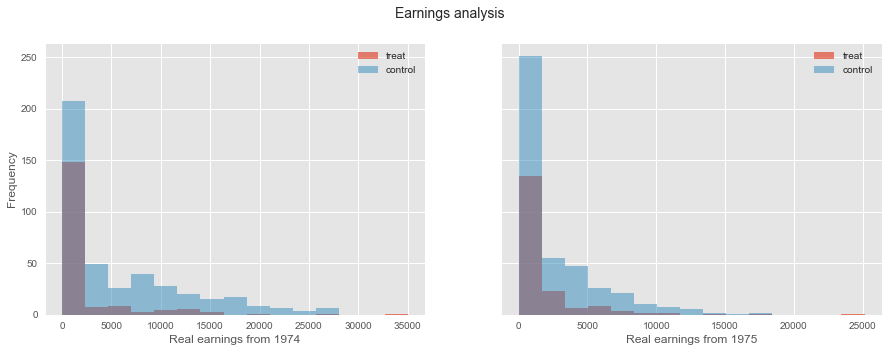

In [8]:
plot_(treat_group_o, control_group_o, 'Earnings analysis', 're74', 'Real earnings from 1974', 'upper right',
      're75', 'Real earnings from 1975', 'upper right')

The earnings do not fit very well between the treat and control groups.

All these observations allow us to realize that the sample selected for this analysis is very poorly represented in terms of the selected features. There is too much disparity. These inequalities skew the conclusions we can draw from the results obtained in the naive analysis. A much more sophisticated analysis is necessary to couteract these inequities.

### 3. A propensity score model

In [9]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()

# the features
X = df[['age', 'educ', 'black', 'hispan', 'married', 'nodegree', 're74', 're75']]
# the output
y = df['treat']

model = logistic.fit(X, y)
# accuracy of the model
score = model.score(X,y)
# probability of each datapoint to be in treat group
probs_distr = model.predict_proba(X)[:,1]

print('Accuracy of logistic regression model: {0:.2f}%' .format(score*100))

Accuracy of logistic regression model: 80.78%


### 4. Balancing the dataset via matching

In [100]:
import networkx as nx

idx_treat = np.where(df['treat'] == 1)[0] # participated
idx_control = np.where(df['treat'] == 0)[0] # not participated

num_people_part = min(idx_treat.shape[0], idx_control.shape[0])

# create a graph
G = nx.Graph()

# add all the indexes as nodes in the graph
for idx in df.index:
    G.add_node(idx)
    
# build the graph with weight between nodes as the distance we want to optimize
for idx_t in idx_treat:
    for idx_c in idx_control:
        w = 1 - (np.abs(probs_distr[idx_t] - probs_distr[idx_c]))
        G.add_edge(idx_t, idx_c, weight=w)   
        
# dictionary with pairs where the weight is maximum
tot_matching = nx.max_weight_matching(G)

In [111]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

# take the first 185 (in our case) pairs of key-value
eq_matching = take(num_people_part, tot_matching.items())

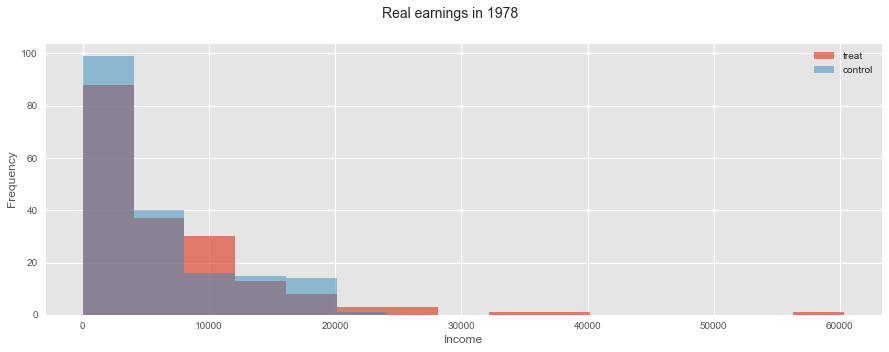

In [112]:
idx_treat_sel = [x[0] for x in eq_matching]
idx_control_sel = [x[1] for x in eq_matching]

# define the new treat and control groups
treat_group = df.loc[idx_treat]
control_group = df.loc[idx_control_sel]

plot_re78(treat_group, control_group)

We see that there is a much better fit between the two categories compared to the same plot of part 1.

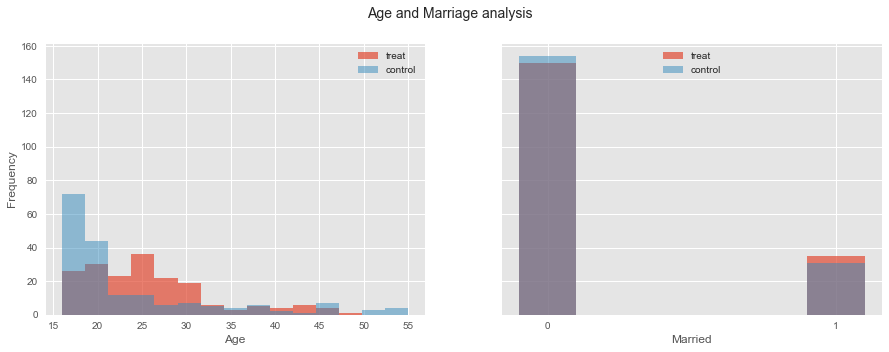

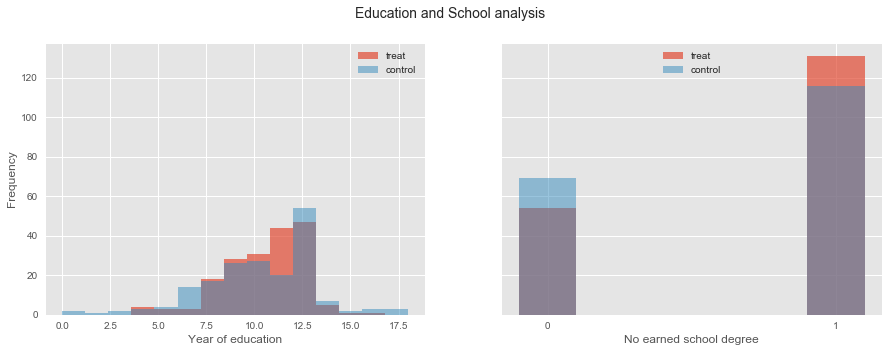

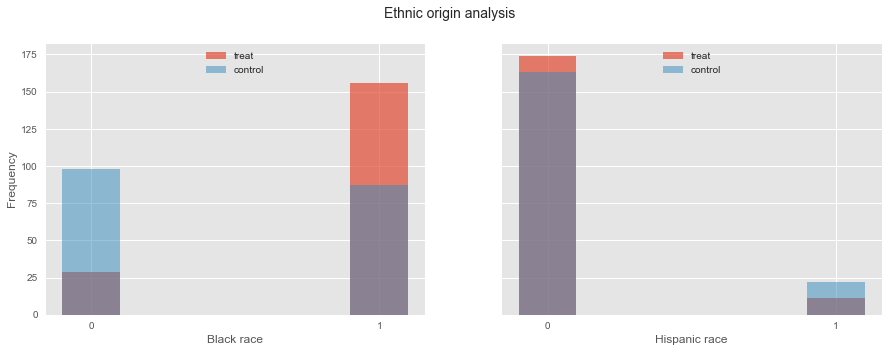

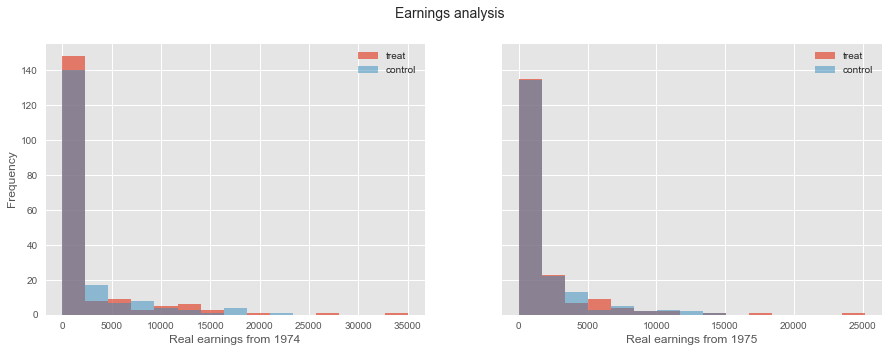

In [113]:
# social status
plot_1binary_(treat_group, control_group, 'Age and Marriage analysis', 'age', 'Age', 'upper right',
      'married', 'Married', 'upper center')

# school background
plot_1binary_(treat_group, control_group, 'Education and School analysis', 'educ', 'Year of education', 'upper right',
      'nodegree', 'No earned school degree', 'upper center')
# ethnic origin
plot_2binary_(treat_group, control_group, 'Ethnic origin analysis', 'black', 'Black race', 'upper center',
      'hispan', 'Hispanic race', 'upper center')

# real earnings
plot_(treat_group, control_group, 'Earnings analysis', 're74', 'Real earnings from 1974', 'upper right',
      're75', 'Real earnings from 1975', 'upper right')

The matches are not perfect yet but the difference between them has been greatly decreased. As a result, the conclusions drawn from the analysis will not be as biased as in the previous case.

### 5. Balancing the groups further

Looking at all the features, we see that the one that needs to be improved in priority is the *black* feature.

In [114]:
num_black_treat = treat_group_o.black.sum()
num_black_control = control_group_o.black.sum()

print('There is {} black people in the treat group, and {} black people in the control group.'
      .format(num_black_treat, num_black_control))

num_people_treat = treat_group_o.shape[0]
num_people_control = control_group_o.shape[0]

print('There is {} people in the treat group and {} people in the control group in total.'
     . format(num_people_treat, num_people_control))

num_black = min(num_black_treat, num_black_control)
num_no_black = min(num_people_treat-num_black_treat, num_people_control-num_black_control)

group_size = num_black+num_no_black

print('This means that we will have {} people from each group.' .format(group_size))

There is 156 black people in the treat group, and 87 black people in the control group.
There is 185 people in the treat group and 429 people in the control group in total.
This means that we will have 116 people from each group.


In [115]:
# create a graph
G_black = nx.Graph()

# add all the indexes as nodes in the graph
for idx in df.index:
    G_black.add_node(idx)
    
# build the graph with weight between nodes as the distance we want to optimize making sure we match only subjects
# that have the same 'black' value
for idx_t in idx_treat:
    for idx_c in idx_control:
        if df.loc[idx_t, 'black'] == df.loc[idx_c, 'black']:
            w = 1 - (np.abs(probs_distr[idx_t] - probs_distr[idx_c]))
            G_black.add_edge(idx_t, idx_c, weight=w)   
        
# dictionary with pairs where the weight is maximum
tot_matching = nx.max_weight_matching(G_black)

In [116]:
# take the first 'group_size' pairs of key-value
eq_matching = take(group_size, tot_matching.items())

In [117]:
idx_treat_sel = [x[0] for x in eq_matching]
idx_control_sel = [x[1] for x in eq_matching]

# define the new treat and control groups
treat_group_b = df.loc[idx_treat_sel]
control_group_b = df.loc[idx_control_sel]

Let's analyze the results of the different features now that we have dealt with the *black* feature.

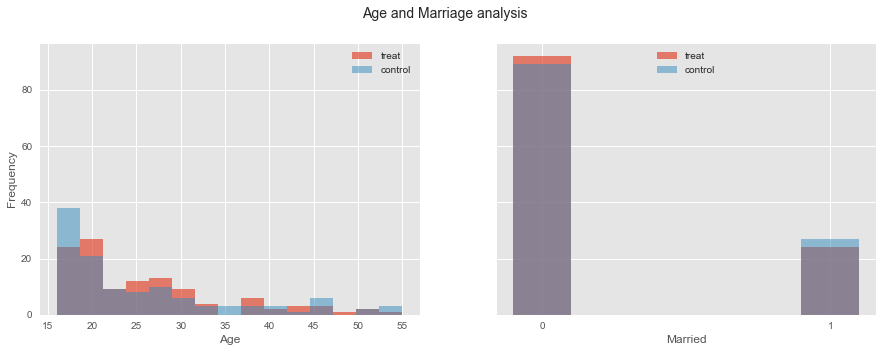

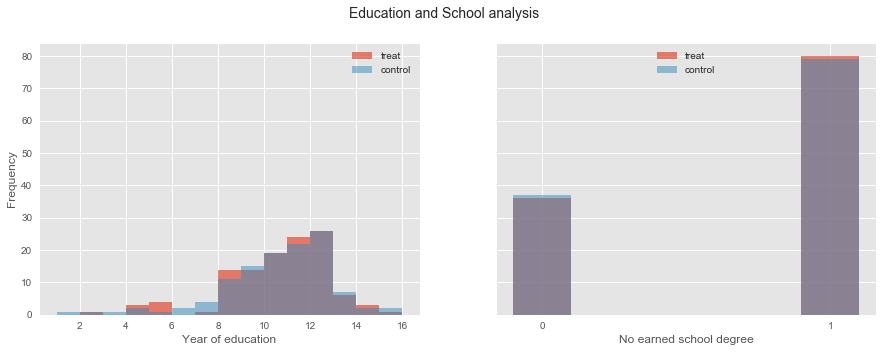

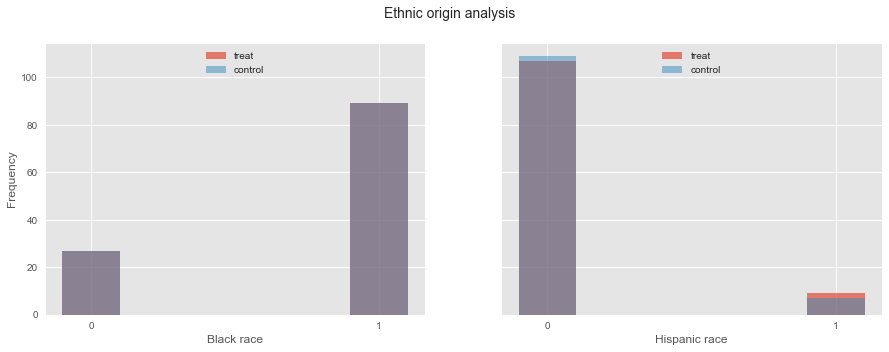

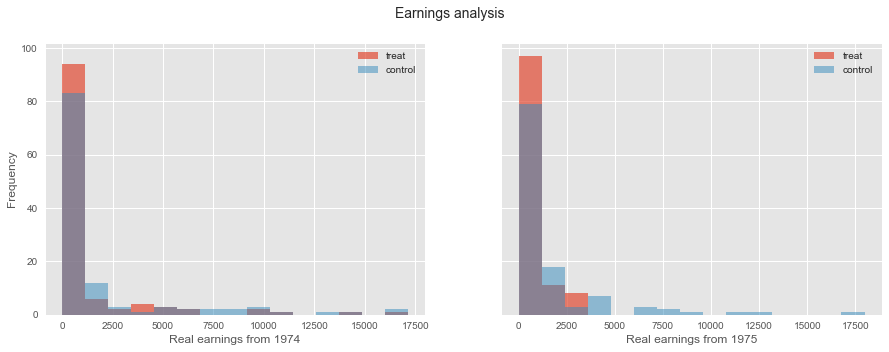

In [118]:
# social status
plot_1binary_(treat_group_b, control_group_b, 'Age and Marriage analysis', 'age', 'Age', 'upper right',
      'married', 'Married', 'upper center')

# school background
plot_1binary_(treat_group_b, control_group_b, 'Education and School analysis', 'educ', 'Year of education', 'upper right',
      'nodegree', 'No earned school degree', 'upper center')
# ethnic origin
plot_2binary_(treat_group_b, control_group_b, 'Ethnic origin analysis', 'black', 'Black race', 'upper center',
      'hispan', 'Hispanic race', 'upper center')

# real earnings
plot_(treat_group_b, control_group_b, 'Earnings analysis', 're74', 'Real earnings from 1974', 'upper right',
      're75', 'Real earnings from 1975', 'upper right')

We see that processing the *black* feature have also enhanced the distribution of the social status and the school background features. The earnings features do not seem to have changed drastically. However, the attentive reader will notice a slightly worse distribution. Therefore, we can conclude that the two groups are now better balanced.

### 6. A less naive analysis

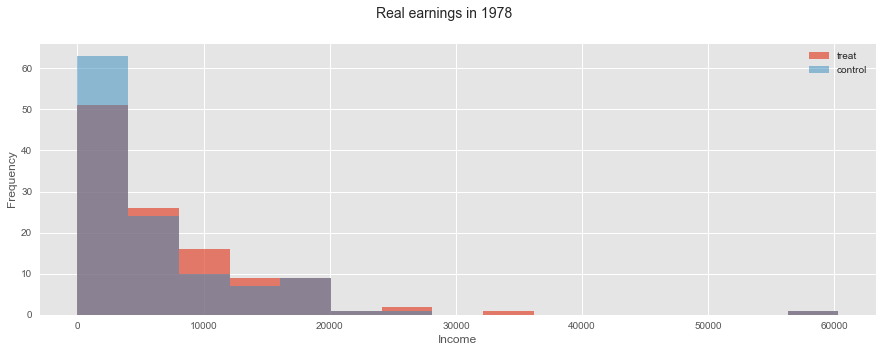

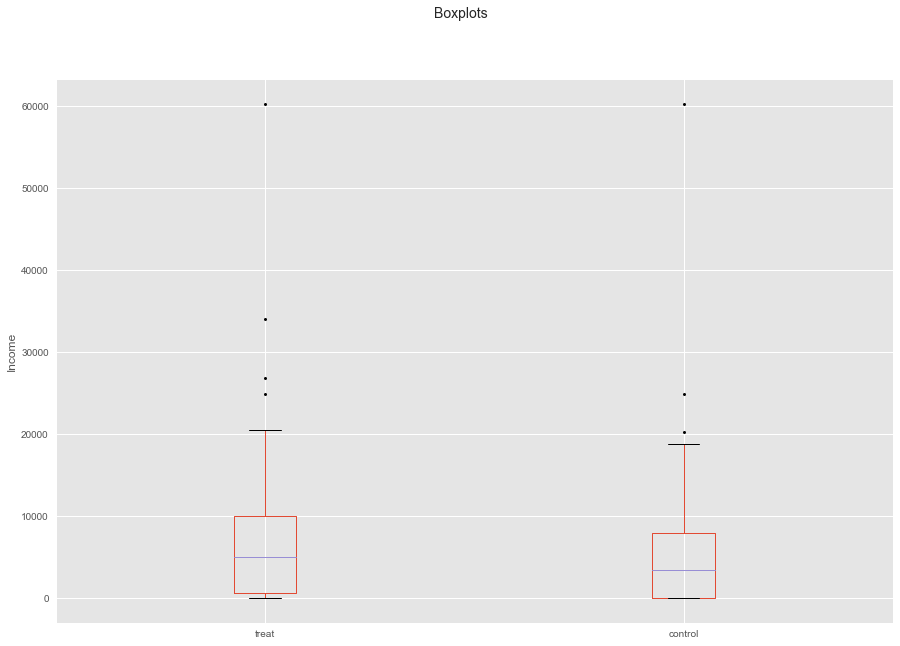

Number of people in treat group:  116 
Number of people in control group:  116


In [119]:
plot_re78(treat_group_b, control_group_b)
boxplot_re78(treat_group_b, control_group_b)

num_people_treat_b = treat_group_b['re78'].shape[0]
num_people_control_b = control_group_b['re78'].shape[0]

print('Number of people in treat group: ', num_people_treat_b, '\nNumber of people in control group: ', num_people_control_b)

In the histogram of the earnings of 1978, we see that there is more people from the control group that have a very low salary (first bin). In the boxplot, we see that the the mean of the salary his higher in the treat group. The value of the third quantile is also higher. Hence, we can conclude (with more certainty than part 1) that the job training program has, although not so big, a positive effect on salaries.

## Question 2

In [ ]:
news = fetch_20newsgroups(subset='all')

Firstly, we split the dataset into a training and a testing set. We build a stratified 10-fold cross validation indices generator and finally, we vectorize the (textual) data by fitting a TF-IDF vectorizer on the training set.

In [3]:
X = news.data
Y = news.target
# Split data into a training and a testing set using stratified sampling
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
    test_size=0.1, random_state=7, stratify=Y)

# Create a stratified 10-fold cross-validation indices generator
SKF = StratifiedKFold(10, shuffle=True, random_state=7)

# Fit a TF-IDF vectorizer on the training set only (indeed we don't want to leak information from the testing
# set in the training set)
vectorizer = TfidfVectorizer().fit(X_train)
# We vectorize the textual data using the vectorizer (fitted only on the training set) for the testing and
# training sets
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)


Here, we fit a Random Forest model with just the default parameters and we compute our accuracy on the testing set.

In [4]:
# We start by fitting a Ranfom Forest model on the training set using the default parameters
model = RandomForestClassifier()
model.fit(X_train, Y_train)
# We compute our prediction on the test set
pred = model.predict(X_test)
# We compute our accuracy based on our prediction on the testing set
print('Accuracy on the testing set with default parameters: {0:.2f}%' .format(accuracy_score(pred, Y_test)*100))

Accuracy on the testing set with default parameters: 64.14%


We commented the cell below since its execution take a long time. We stored the results into a csv. If you want to re-run the code, you can just uncomment this cell. We optimized the parameters of the Random Forest model using a Grid Search with 10-fold stratified cross validation. Then, we show the results in the form of a heatmap. For computing time consideration, we restricted ourselves to a domain from 0 to 200 with a 20 step for the max_depth and n_estimators parameters. The best results we get was at max_dept=140 and n_estimators=200. Unfortunately, the optimum value were on the "border" of the grid, this suggests that we could have even better parameters by extending the domain of our grid. We didn't do it since it take a long time especially for models with high-valued parameters (it increases the complexity and thus the time to fit).

In [5]:
## We choose a domain for each parameter we want to optimize
## For computation time consideration we restricted ourselves to a grid from 0 to 200 for each parameter
## with a step of 20
#tuned_parameters = {
#    'n_estimators': list(range(0, 201, 20))[1:],
#    'max_depth': list(range(0, 201, 20))[1:]
#} 
#
## We then build a Grid Search object with our stratified cross validation indices generator precedently created
## So for each combination of parameters of the grid we'll run a 10-fold cross validation
#clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=SKF, 
#                   scoring='accuracy', n_jobs=15, refit=False, 
#                   return_train_score=True, verbose=2)
#
## We run the grid search
#clf.fit(X_train, Y_train)
#
## We save it since it's a relatively long operation
#pd.DataFrame(clf.cv_results_).to_csv('grid_search.csv')

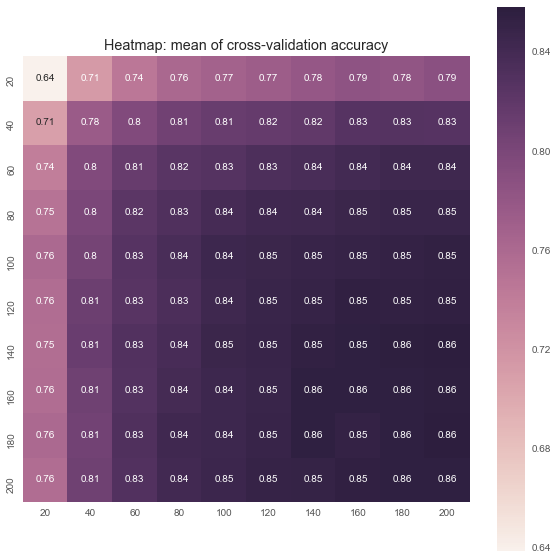

,max_depth,n_estimators,mean_test_score
69,140,200,0.858027


In [6]:
# Code to show the results of the grid search through a hit map
res = pd.read_csv('grid_search.csv')
params = list(map(eval, res.params.values))
params = pd.DataFrame(params)
hm = pd.concat([params, res.mean_test_score, res.rank_test_score], axis=1)
best_params = hm[hm['rank_test_score'] == 1][['max_depth', 'n_estimators', 'mean_test_score']]

max_depth_labs = hm['max_depth'].unique() 
nb_est_labs = hm['n_estimators'].unique() 
mat = np.zeros(shape=(len(max_depth_labs), len(nb_est_labs)))
for i, depth in enumerate(max_depth_labs):
    for j, n_est in enumerate(nb_est_labs):
        mat[i, j] = hm[(hm['max_depth']==depth) & (hm['n_estimators']==n_est)]['mean_test_score'].values[0]
mat = pd.DataFrame(mat, index=hm.max_depth.unique(), columns=hm.n_estimators.unique())
    
plt.figure(figsize=(10, 10))
sns.heatmap(mat, square=True, annot=True)
plt.title('Heatmap: mean of cross-validation accuracy')
plt.show()

best_params

In [13]:
# Here we refit the model on the best parameter found using grid search
model = RandomForestClassifier(max_depth=best_params.max_depth.values[0],
                               n_estimators=best_params.n_estimators.values[0])
model.fit(X_train, Y_train)
pred = model.predict(X_test)
# We show the accuracy on the testing set for the optimal parameters
print('Accuracy on the testing set with optimal parameters: {0:.2f}%' .format(accuracy_score(pred, Y_test)*100))

Accuracy on the testing set with optimal parameters: 82.97%


Now we show the confusion matrix on the testing set. Here, it's interesting to see how the different classes are confused by the model. For instance, if we take the *talk.religion.misc* class, we can see that it is poorly classified (only 54% accuracy) and it's mainly confused with the class *soc.religion.christian*. This confusion makes sense since these two classes seem to be strongly related. Another example is the *talk.politics.misc* which is confused the most with *talk.politics.gun* which also makes sense, the two topics seem to be close and it's harder for the model to discriminate them.

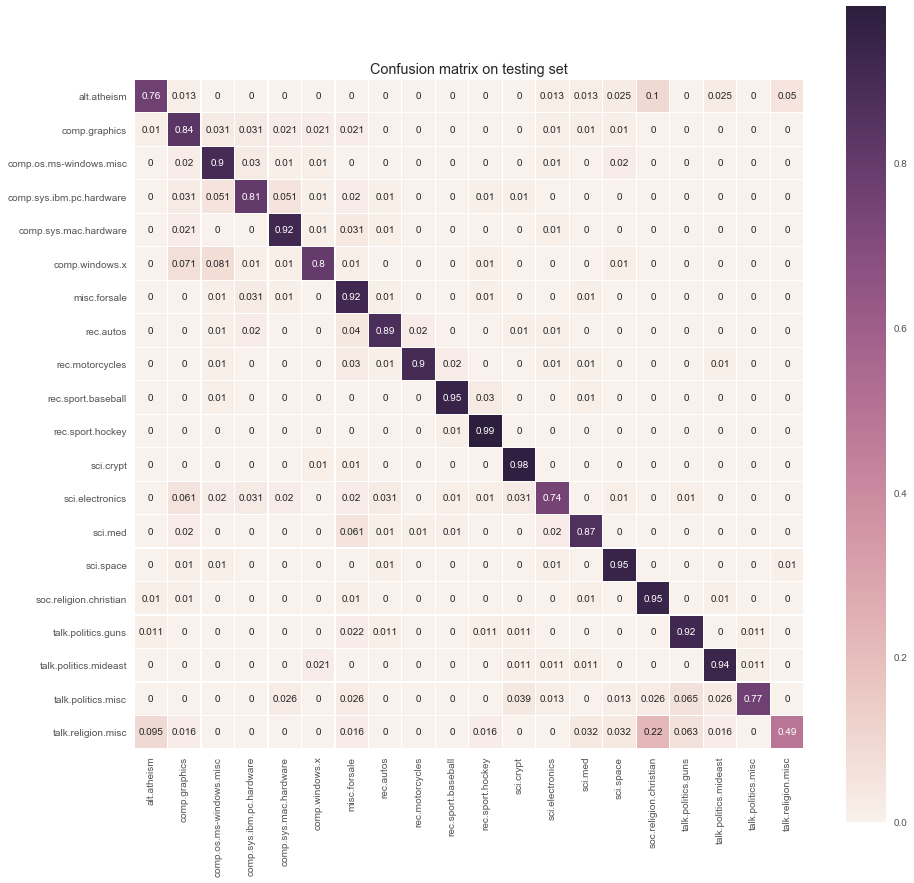

In [8]:
cm = confusion_matrix(Y_test, pred)
cm = pd.DataFrame(cm, index=news.target_names, 
                  columns=news.target_names)
cm = cm.div(cm.sum(axis=1), axis=0)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, square=True, annot=True, linewidths=0.1)
plt.title('Confusion matrix on testing set')
plt.show()

Here, we explore the importance of the different features. First, we show the top 10 most and least important features. As we can see, words which represent clearly a specific topic/context are the most important ones. For instance *"clipper"*, *"bike"*, *"car"*, *"sale"*, ... are words that clearly mark a specific context (*car* for automobile). There are however some exceptions like *"the"*, *"of"*, ... <br />  
The least significant ones are the *outliers* like we can see in the top 10 least important features: *"62494hj6t8yv"*, *"jarlehto"*, *"6245"*. Indeed, these words are likely not frequent outliers which are not really representing a specific topic. <br />
# Bonus
Lastly, we tried to plot the features importance ordered from most to least importance. We see here an exponentially decaying function which indicates that a lot of features might not be relevant. So we tried to keep the 2000 first most important features and build a new model with the same parameters than the optimal one we found with Grid Search. Doing so we still have model with good accuracy (only 3% below the other ones). Conclusion: by keeping a bit more than 1% of the data we lost only 3% of accuracy. This shows that a few words matter to classify well the topics and there is a lot of words which bring just a tiny part of the information needed.

Top 10 most important features
   feature  importance     word
0   131953    0.004584     sale
1   156965    0.003789  windows
2    61727    0.003739      dod
3    43033    0.003587     bike
4    48696    0.003130      car
5   126212    0.002756       re
6   113246    0.002670       of
7   137723    0.002597    space
8   144431    0.002593      the
9    75738    0.002580      god

Top 10 least important features
        feature  importance            word
164512    70041         0.0           ff1qr
164513    70040         0.0           ff1d9
164514    70039         0.0  ff1d3hzd3hzrck
164515    70038         0.0         ff1d3hz
164516    70037         0.0         ff1d3ho
164517    70036         0.0           ff1d2
164518    70035         0.0           ff1al
164519    70034         0.0         ff1ah9i
164520    70033         0.0        ff1aff1d
164521   164521         0.0         ÿhooked


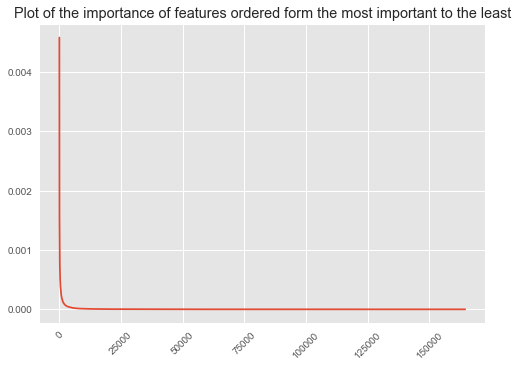

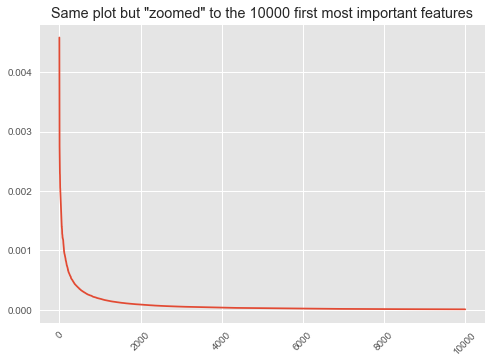

In [9]:
# Get a mapping from index to word
idx_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}

# Get feature immportance 
importances = model.feature_importances_

df = pd.DataFrame([{
    'word': idx_to_word[feature],
    'feature': feature,
    'importance': importances[feature]
} for feature in range(len(importances))])

df = df.sort_values('importance', ascending=False).reset_index()
del df['index']


print('Top 10 most important features')
print(df.iloc[:10])
print()
print('Top 10 least important features')
print(df.iloc[-10:])

fig = df.importance.plot(rot=45)
fig.autoscale(tight=False)
plt.title('Plot of the importance of features ordered form the most important to the least')
plt.show()

fig = df.importance.iloc[:10000].plot(rot=45)
fig.autoscale(tight=False)
plt.title('Same plot but "zoomed" to the 10000 first most important features')
plt.show()



In [10]:
kept_words = [idx_to_word[f] for f in np.argsort(importances)[::-1][:2000]]


X = news.data
Y = news.target
# Split data into a training and a testing set using stratified sampling
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
    test_size=0.1, random_state=7, stratify=Y)

# Create a stratified 10-fold cross-validation indices generator
SKF = StratifiedKFold(10, shuffle=True, random_state=7)

# Fit a TF-IDF vectorizer on the training set only (indeed we don't want to leak information from the testing
# set in the training set)
vectorizer = TfidfVectorizer(vocabulary=kept_words).fit(X_train)
# We vectorize the textual data using the vectorizer (fitted only on the training set) for the testing and
# training sets
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [12]:
model = RandomForestClassifier(max_depth=best_params.max_depth.values[0],
                               n_estimators=best_params.n_estimators.values[0])
model.fit(X_train, Y_train)
pred = model.predict(X_test)
print('Accuracy on the testing set by keeping the first 2000 most important features: {0:.2f}%' .format(accuracy_score(pred, Y_test)*100))

Accuracy on the testing set by keeping the first 2000 most important features: 82.33%
